# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

In [1]:
#test
#print((5-3).sum())

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.) #this is random so not good
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [3]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

##############################################################################################################3
# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose state = np.array([
                                                #pose.position.x, pose.position.y, pose.position.z,
                                                #pose.orientation.x, pose.orientation.y, pose.orientation.z, 
                                                
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task) #change this to another agent
done = False
##################################################################################################################
#####Save results by annotating with labels and in dictionary results
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}
#################################################################################################################
# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act() #agent acts
        _, _, done = task.step(rotor_speeds)# and then we apply send the agent's actions to task
        #write to file
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

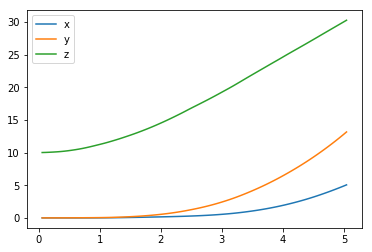

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()
#for takeoff, x and y don't need to move at all, z increases from 0
#for hover, you want z steady, x and y steady but start of z>0 
#for landing, x and y steady and z declines  

The next code cell visualizes the velocity of the quadcopter.

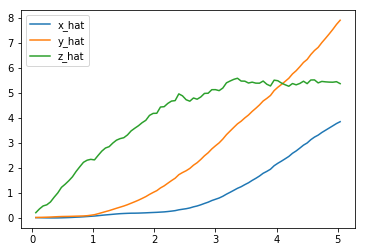

In [5]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

#Hover:  RPMs on 4 rotors equal, enough to get off ground but not to climb
#Ascent:  RPMs on 4 rotors increased simultaneously by equal amount
#Descent: RPMs on 4 rotors decreased simultaneously by equal amount
#Pitch: increase rear RPMs or decrease front RPMs (tilts copter so rotors are now pushing it fwd or bwd)
#Roll:  increase or decrease RPMs on either side 
#Yaw: increase RPM on opposing pairs of motors, ie. top left and bottom left to yaw left




Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

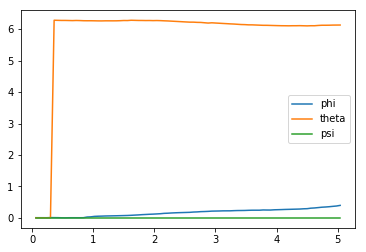

In [6]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()
###I think we want these as zero

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

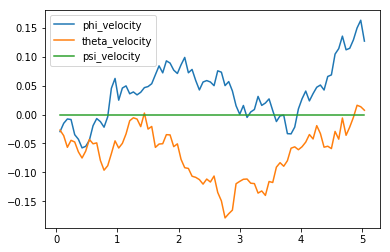

In [7]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

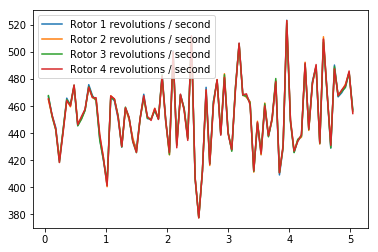

In [8]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 5.05480665 13.15502619 30.25626272  0.39829421  6.13088678  0.        ]
[3.84037965 7.90421218 5.36471042]
[0.12698399 0.00737071 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
#############basically repeat this cell to train agent
import sys
import pandas as pd
##########################################
from agents.policy_search import PolicySearch_Agent###################importing classes 
from task import Task

##########################################
num_episodes = 1000
target_pos = np.array([0., 0., 10.])#looks like a takeoff

task = Task(target_pos=target_pos)
######this has to change
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) # Choose action based on given state and policy
        next_state, reward, done = task.step(action) #Uses action to obtain next state, reward, done."""
        agent.step(reward, done) #save experience/reward
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  99.453 (best = 38556.163), noise_scale = 3.226

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [11]:
## TODO: Train your agent here.

#%load_ext autoreload
#%autoreload 2

!pip install -U keras==2.1.2

import csv
import numpy as np
import sys
import pandas as pd

#imports from agent.py 
from agents.agent import DDPG
#from agents.agent import Actor
#from agents.agent import Critic
#from agents.agent import OUNoise
#from agents.agent import ReplayBuffer
#from task.py
from task import Task

num_episodes = 1000
runtime = 5.
init_pose = np.array([0., 0., 2., 0., 0., 0.])   #initial position
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
target_pos = np.array([0., 0., 10.])  #target position
#target_pos = target_pos[2]
file_output = 'data.txt'                       # file name for saved results

#Setup
task = Task(init_pose=init_pose,target_pos=target_pos)
agent = DDPG(task)
done = False

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
all_results=[]
results = {x : [] for x in labels}

##########################################################################################################
# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        results = {x : [] for x in labels}
        plot_data = {x : [] for x in ['episode', 'total_reward']}    
       
        while True:
            rotor_speeds = agent.act(state)
            next_state, reward, done = task.step(rotor_speeds) #
            to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) \
            + list(rotor_speeds)
            agent.step(action=rotor_speeds, reward=reward, next_state=next_state, done=done)
            state = next_state
            
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            writer.writerow(to_write)
            if done:
                print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format( \
                i_episode, agent.score, agent.best_score), end="")  # [debug]
                all_results.append(results)
                plot_data['episode'].append(i_episode)
                plot_data['total_reward'].append(agent.total_reward)
                #########################################
                print(task.sim.pose[2])
                break
        sys.stdout.flush()
       





Requirement already up-to-date: keras==2.1.2 in /home/nobu/anaconda3/lib/python3.6/site-packages (2.1.2)
Requirement not upgraded as not directly required: six>=1.9.0 in /home/nobu/anaconda3/lib/python3.6/site-packages (from keras==2.1.2) (1.11.0)
Requirement not upgraded as not directly required: numpy>=1.9.1 in /home/nobu/anaconda3/lib/python3.6/site-packages (from keras==2.1.2) (1.14.2)
Requirement not upgraded as not directly required: scipy>=0.14 in /home/nobu/anaconda3/lib/python3.6/site-packages (from keras==2.1.2) (1.0.1)
Requirement not upgraded as not directly required: pyyaml in /home/nobu/anaconda3/lib/python3.6/site-packages (from keras==2.1.2) (3.12)


/home/nobu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/nobu/anaconda3/lib/python3.6/site-packages/keras/activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


Episode =    1, score = -37.769 (best = -37.769)0.0
Episode =    2, score = -37.142 (best = -37.142)0.0
Episode =    3, score = -37.837 (best = -37.142)0.0
Episode =    4, score = -38.056 (best = -37.142)0.0
Episode =    5, score = -32.051 (best = -32.051)0.0
Episode =    6, score = -36.703 (best = -32.051)0.0
Episode =    7, score = -36.311 (best = -32.051)0.0
Episode =    8, score = -34.204 (best = -32.051)0.0
Episode =    9, score = -34.735 (best = -32.051)0.0
Episode =   10, score = -40.711 (best = -32.051)0.0
Episode =   11, score = -20.229 (best = -20.229)0.0
Episode =   12, score = 60110.970 (best = 60110.970)67.38111393791607
Episode =   13, score = -42.781 (best = 60110.970)0.0
Episode =   14, score = -50.236 (best = 60110.970)0.0
Episode =   15, score = -21.839 (best = 60110.970)0.0
Episode =   16, score = -27.544 (best = 60110.970)0.0
Episode =   17, score = -132.626 (best = 60110.970)1.8308030724001958
Episode =   18, score = -50.435 (best = 60110.970)0.0
Episode =   19, sc

Episode =  153, score = -31.977 (best = 60110.970)0.0
Episode =  154, score = -33.521 (best = 60110.970)0.0
Episode =  155, score = -31.927 (best = 60110.970)0.0
Episode =  156, score = -33.389 (best = 60110.970)0.0
Episode =  157, score = -33.211 (best = 60110.970)0.0
Episode =  158, score = -42.522 (best = 60110.970)0.0
Episode =  159, score = -33.216 (best = 60110.970)0.0
Episode =  160, score = -37.538 (best = 60110.970)0.0
Episode =  161, score = -43.725 (best = 60110.970)0.0
Episode =  162, score = -36.236 (best = 60110.970)0.0
Episode =  163, score = -34.221 (best = 60110.970)0.0
Episode =  164, score = -33.391 (best = 60110.970)0.0
Episode =  165, score = -33.063 (best = 60110.970)0.0
Episode =  166, score = -34.046 (best = 60110.970)0.0
Episode =  167, score = -33.253 (best = 60110.970)0.0
Episode =  168, score = -33.946 (best = 60110.970)0.0
Episode =  169, score = -32.282 (best = 60110.970)0.0
Episode =  170, score = -31.016 (best = 60110.970)0.0
Episode =  171, score = -33.

Episode =  299, score = 85544.568 (best = 89054.504)129.36703805657223
Episode =  300, score = 85745.897 (best = 89054.504)130.04042042271078
Episode =  301, score = 85757.538 (best = 89054.504)129.9821273605823
Episode =  302, score = 86140.189 (best = 89054.504)131.24688807477605
Episode =  303, score = 85489.357 (best = 89054.504)128.58746095984787
Episode =  304, score = 85151.617 (best = 89054.504)127.03503712134126
Episode =  305, score = 84850.649 (best = 89054.504)126.04586836632055
Episode =  306, score = 85772.371 (best = 89054.504)129.7169466783667
Episode =  307, score = 86112.989 (best = 89054.504)131.35398194002258
Episode =  308, score = 85841.377 (best = 89054.504)130.25824276624778
Episode =  309, score = 86251.421 (best = 89054.504)130.76280372579555
Episode =  310, score = 85587.968 (best = 89054.504)128.9982408735463
Episode =  311, score = 85627.469 (best = 89054.504)129.47333549898138
Episode =  312, score = 86700.860 (best = 89054.504)132.450359133692
Episode =  

Episode =  415, score = 85424.556 (best = 89054.504)128.94463884419903
Episode =  416, score = 85771.170 (best = 89054.504)130.11281706764666
Episode =  417, score = 84788.990 (best = 89054.504)125.85336833846533
Episode =  418, score = 85980.487 (best = 89054.504)130.4985398560648
Episode =  419, score = 85571.512 (best = 89054.504)129.2160471451433
Episode =  420, score = 85258.966 (best = 89054.504)128.29977294203715
Episode =  421, score = 85552.307 (best = 89054.504)129.35330788002855
Episode =  422, score = 86009.124 (best = 89054.504)130.7052543177319
Episode =  423, score = 85498.463 (best = 89054.504)128.88789411809597
Episode =  424, score = 85558.478 (best = 89054.504)129.28345755412928
Episode =  425, score = 85842.955 (best = 89054.504)129.77685376532682
Episode =  426, score = 85649.515 (best = 89054.504)129.64989592361067
Episode =  427, score = 85599.924 (best = 89054.504)129.6273043813734
Episode =  428, score = 85724.520 (best = 89054.504)129.81920120241625
Episode = 

Episode =  531, score = 85770.258 (best = 89070.910)130.0002211734873
Episode =  532, score = 85506.053 (best = 89070.910)129.3050830682309
Episode =  533, score = 85723.337 (best = 89070.910)129.68001899066243
Episode =  534, score = 85655.905 (best = 89070.910)129.45686440235536
Episode =  535, score = 85245.040 (best = 89070.910)127.66924510204986
Episode =  536, score = 86092.644 (best = 89070.910)130.95222875280567
Episode =  537, score = 85666.849 (best = 89070.910)129.72309888695995
Episode =  538, score = 85756.824 (best = 89070.910)129.9571901300183
Episode =  539, score = 85623.385 (best = 89070.910)128.99137617893396
Episode =  540, score = 85272.720 (best = 89070.910)128.1425298803336
Episode =  541, score = 85790.363 (best = 89070.910)129.94028545751968
Episode =  542, score = 85731.234 (best = 89070.910)129.75372454100764
Episode =  543, score = 85843.723 (best = 89070.910)129.98871907514004
Episode =  544, score = 85500.251 (best = 89070.910)128.99667304221876
Episode = 

Episode =  647, score = 85778.539 (best = 89070.910)130.13120567928945
Episode =  648, score = 85193.147 (best = 89070.910)128.29306819392838
Episode =  649, score = 84521.094 (best = 89070.910)124.87359913049424
Episode =  650, score = 85521.719 (best = 89070.910)128.97083867938449
Episode =  651, score = 85060.430 (best = 89070.910)127.76948416287287
Episode =  652, score = 85762.516 (best = 89070.910)129.38679676116823
Episode =  653, score = 85517.555 (best = 89070.910)129.15612267075429
Episode =  654, score = 85706.860 (best = 89070.910)129.5232458289961
Episode =  655, score = 85667.226 (best = 89070.910)129.75925858458268
Episode =  656, score = 85579.598 (best = 89070.910)129.04387094864606
Episode =  657, score = 85641.099 (best = 89070.910)129.67545794246774
Episode =  658, score = 85677.216 (best = 89070.910)128.88275089322633
Episode =  659, score = 85766.030 (best = 89070.910)129.71521077184218
Episode =  660, score = 85581.929 (best = 89070.910)129.39199944575162
Episode

Episode =  763, score = 85535.598 (best = 89070.910)128.78599041339825
Episode =  764, score = 85742.017 (best = 89070.910)129.97453596974376
Episode =  765, score = 85768.333 (best = 89070.910)130.0092425932439
Episode =  766, score = 85628.252 (best = 89070.910)129.54276868286792
Episode =  767, score = 86060.358 (best = 89070.910)131.09603942097502
Episode =  768, score = 85605.955 (best = 89070.910)129.37192916702762
Episode =  769, score = 85673.414 (best = 89070.910)129.53185325627373
Episode =  770, score = 85652.950 (best = 89070.910)129.66930356904479
Episode =  771, score = 85767.068 (best = 89070.910)129.8955949407207
Episode =  772, score = 86141.968 (best = 89070.910)130.37642809576175
Episode =  773, score = 85809.222 (best = 89070.910)130.0080327880433
Episode =  774, score = 85399.627 (best = 89070.910)129.06950163190675
Episode =  775, score = 85808.160 (best = 89070.910)130.0764987116856
Episode =  776, score = 85588.504 (best = 89070.910)129.77683895378533
Episode = 

Episode =  879, score = 85423.124 (best = 89070.910)128.84392246429024
Episode =  880, score = 85442.121 (best = 89070.910)128.7130060299935
Episode =  881, score = 85767.757 (best = 89070.910)130.09850690252776
Episode =  882, score = 85481.262 (best = 89070.910)128.50481774511368
Episode =  883, score = 85878.973 (best = 89070.910)130.276341761558
Episode =  884, score = 85578.424 (best = 89070.910)129.5228012765492
Episode =  885, score = 85806.769 (best = 89070.910)130.27206343973089
Episode =  886, score = 85669.841 (best = 89070.910)129.7037195173954
Episode =  887, score = 85800.139 (best = 89070.910)130.0412412016445
Episode =  888, score = 85637.248 (best = 89070.910)129.71693367265024
Episode =  889, score = 85703.873 (best = 89070.910)129.4320997988536
Episode =  890, score = 85387.827 (best = 89070.910)128.74159572590403
Episode =  891, score = 85608.172 (best = 89070.910)129.6384508161067
Episode =  892, score = 85613.115 (best = 89070.910)129.71413059189877
Episode =  893

Episode =  995, score = 86118.009 (best = 89070.910)130.99153830991474
Episode =  996, score = 85285.176 (best = 89070.910)127.2298284165979
Episode =  997, score = 85517.457 (best = 89070.910)128.79095647817462
Episode =  998, score = 85833.484 (best = 89070.910)130.1520736809017
Episode =  999, score = 85771.373 (best = 89070.910)129.9236435256306
Episode = 1000, score = 85716.085 (best = 89070.910)129.62580139575803


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

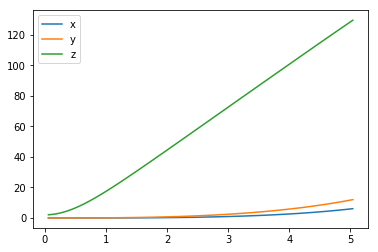

In [12]:
## TODO: Plot the rewards.

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label ='x')
plt.plot(results['time'], results['y'], label ='y')
plt.plot(results['time'], results['z'], label ='z')
plt.legend()
_ = plt.ylim()


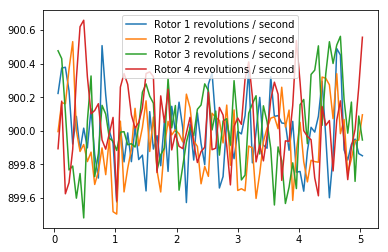

In [13]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: Upon recommendation from the reviewer and Rahul, I focused on z position and z velocity as including other parameters would be too much for the agent to learn.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

Well, the Actor-Critic method was provided to us with accompanying code for noise and replay.  I still don't understand the noise, ie. is there a way to implement an epsilon-greedy type way to achieve some randomness there?  So I get that the Actor improves the policy and the Critic evaluates it and this is a sorf of off-policy method?  I need more time to understand the difference between on-policy and off.  This is the only one I tried since I know it's a continous state space and we need function approximation by using the neural network.  
I left all the hyperparameters alone except for theta in DDPG bumped up to 0.5 based on another student's posting in forums.  For the architecture, I copied the provided solution implementation except made the hidden layers about 50% larger since the training seemed to go fast I thought it could handle more and more is better?  
I copied the leaky ReLU provided in the solution implementation which we used in an earlier project, I think it just turns a negative into a very small positive.  

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: My plot looks almost ideal in that the Z increments linearly with almost no movement in x and y axis but the output shows that it learns a certain z position of around 130 and then just repeats this from about the 277th episode so I guess it is an aha moment.  However I designed the reward function to incrementally give larger rewards for final z position above target but it stayed around 130 rather going to 300 so not sure what happened.  
The mean rewards I did not calculate but if you look at output, it fluctuates very little from 130 from 277th episode to 1000th.  

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: Getting started for sure. I threw my hands up, whined and moaned and received the solution code.  Honestly, I might sort of kind of have a very vague idea of what is happening but this project is overwhelming and after reading about the reinforcmenet agent that learns how to play Atari games, I would have preferred that since even if I understand this project, getting a grip on physics_sim might be beyond reach (I don't have a strong physics background) and a bit too time consuming considering that is not my final goal.  So I'll take the vague idea I got on this and apply in trying to build an agent that plays video games or chess or go.  The task was given to us and forum mentor is very good at narrowing down our focus to pass.  I did not even look at hover nor land because as mentioned this project is too difficult.  
I guess the aha moment when the agent realizes what it needs to do to get rewards at z height of about 130 and just continues to mostly repeat this from episode 277 onwards is kind of neat to see but I read in the forums that there is something wrong with physics_sim which no mentor has replied to.  The other strange thing is how the plot for rotor speeds show that the four are not coordinated.  Thus there should have been quite a bit of movment in x-y axis due to pitch/roll/yaw changes as I watched a video on how quadcopters fly on Youtube.  But as mentioned earlier, the plot shows very little movement in x-y axis.  

Thus, I have unanswered questions in my head but just happy to see that nice plot with z moving above target height and although this is a strange way to finish a course (pass even if the agent does not learn properly) which reduces satisfaction (sort of like only running the GAN project for 2 epochs) and makes me think Udacity is just trying to make a large profit by not letting us use all the time available for GPU workspace and for not bothering to implement necessary overhauls of the course but you gave me what I wanted in the end so I'm somewhat satisifed as long as my access to course materials is for perpetuity as I believe the forum mentor mentioned.  
I think over the course of the next year or two, I will review the material as much as possible so I actually know it.  My mentor Soon Yau who quit told me I'm not getting a job just by doing the projects and I felt that too since all projects except for the last one, I could get away with copy and paste and cite.  
  I still have the large task to understand the code line-by-line so inserting print statements and hand tracing will take quite a while and not sure whether to do this by creating empty cells in the ipynb or somewhere else.  As mentioned, I will not be continuing on to the next phase because a: I don't feel comfortable with this material.  b:  I think that if I truly master this foundational level, then the next level might be a learn-on-the-job sort of deal.  I have also seen many new AI/deep learning courses come online at Udacity since I signed up so I question how resources are being allocated away from this one and whether those other courses are designed better since you had this one to get feedback from.  In which case, more transparency would be nice.  I quit my job in accounting/finance because I did not like the opaque nature of the industry in general so am saddened to learn that Silicon Valley company and people are turning out to be no different.  Just read about those special tax exempt charity foundations on theatlantic.com that actually don't pay out anything to help poor people in your area.  So it's my mistake to demand more transparency from Udacity as you are a for-profit entity and gradually moving away from my projected ideal on to it as a platform to truly educate.  I learned but as a consumer will definitely look at all other options before considering another Udacity course unless I received a scholarship which I fully doubt or a heavy heavy discount to the tune of 70% off or more.    